In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/heart.csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
numeric_columns = df.select_dtypes(include=np.number)

# Calculate mean, median, mode, and standard deviation
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
mode_values = numeric_columns.mode().iloc[0]
std_dev_values = numeric_columns.std()

summary_statistics = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

print(summary_statistics)

                Mean  Median   Mode  Standard Deviation
age        54.366337    55.0   58.0            9.082101
sex         0.683168     1.0    1.0            0.466011
cp          0.966997     1.0    0.0            1.032052
trtbps    131.623762   130.0  120.0           17.538143
chol      246.264026   240.0  197.0           51.830751
fbs         0.148515     0.0    0.0            0.356198
restecg     0.528053     1.0    1.0            0.525860
thalachh  149.646865   153.0  162.0           22.905161
exng        0.326733     0.0    0.0            0.469794
oldpeak     1.039604     0.8    0.0            1.161075
slp         1.399340     1.0    2.0            0.616226
caa         0.729373     0.0    0.0            1.022606
thall       2.313531     2.0    2.0            0.612277
output      0.544554     1.0    1.0            0.498835


In [ ]:
# Категориялық айнымалыларды талдау
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall']

# Жиілігін санау
for col in categorical_columns:
    print(f"Жиілік ({col}):")
    print(df[col].value_counts(), "\n")

# groupby() арқылы қорытындылау
# Мысалы, 'cp' және 'sex' бойынша деректерді топтап, әрбір топ бойынша орташа жасы мен холестерин деңгейін есептеу
grouped_data = df.groupby(['cp', 'sex'])[['age', 'chol']].mean()
print("Топталған деректер (cp, sex бойынша орташа жас және холестерин):")
print(grouped_data)


Жиілік (sex):
sex
1    207
0     96
Name: count, dtype: int64 

Жиілік (cp):
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64 

Жиілік (fbs):
fbs
0    258
1     45
Name: count, dtype: int64 

Жиілік (restecg):
restecg
1    152
0    147
2      4
Name: count, dtype: int64 

Жиілік (slp):
slp
2    142
1    140
0     21
Name: count, dtype: int64 

Жиілік (caa):
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64 

Жиілік (thall):
thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64 

Жиілік (output):
output
1    165
0    138
Name: count, dtype: int64 

Топталған деректер (cp, sex бойынша орташа жас және холестерин):
              age        chol
cp sex                       
0  0    57.256410  267.538462
   1    55.105769  243.605769
1  0    51.944444  251.444444
   1    51.031250  241.031250
2  0    54.971429  261.057143
   1    52.538462  231.134615
3  0    63.250000  247.000000
   1    54.315789  235.052632


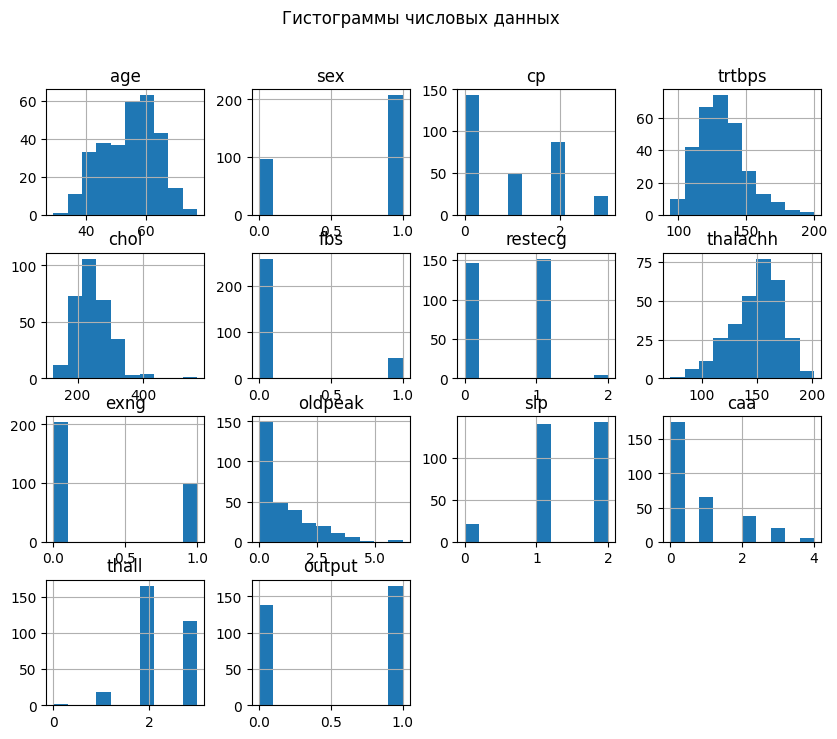

In [ ]:
# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=[np.number])

#  Гистограмма для числового распределения
numeric_columns.hist(bins=10, figsize=(10, 8))
plt.suptitle('Гистограммы числовых данных')
plt.show()



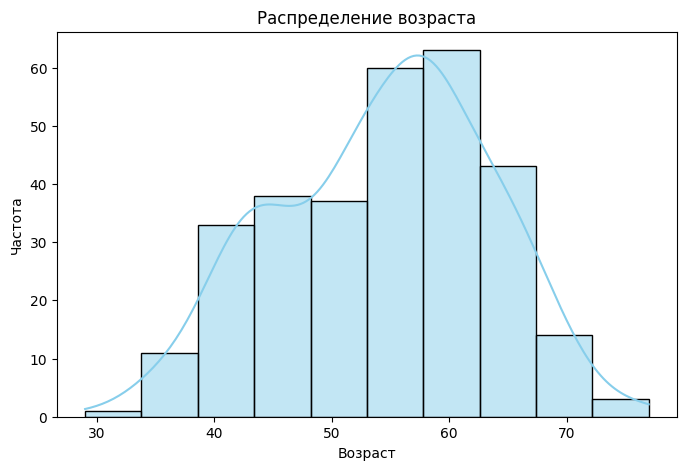

In [ ]:

#  Гистограмма для возраста
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=10, color='skyblue') # Changed 'Age' to 'age'
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


<ipython-input-18-be51b4c4b921>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel') # Changed 'Gender' to 'sex'


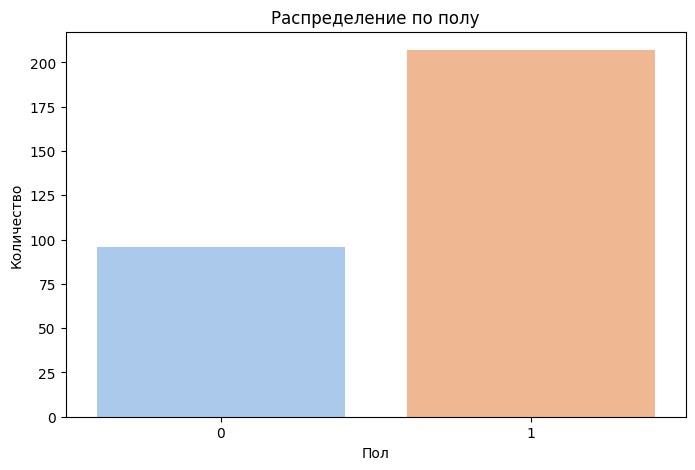

In [ ]:
#  Столбчатая диаграмма для категориальных данных (например, по полу)
if 'sex' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sex', data=df, palette='pastel')
    plt.title('Распределение по полу')
    plt.xlabel('Пол')
    plt.ylabel('Количество')
    plt.show()


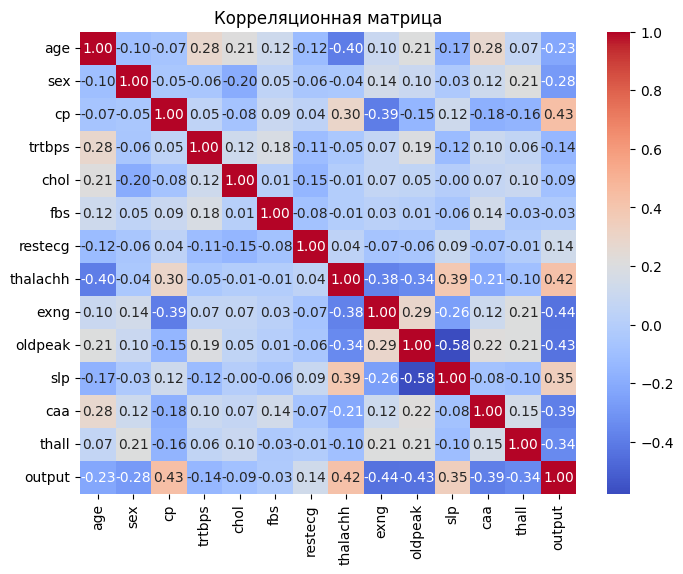

In [ ]:
#  Корреляционная матрица
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()


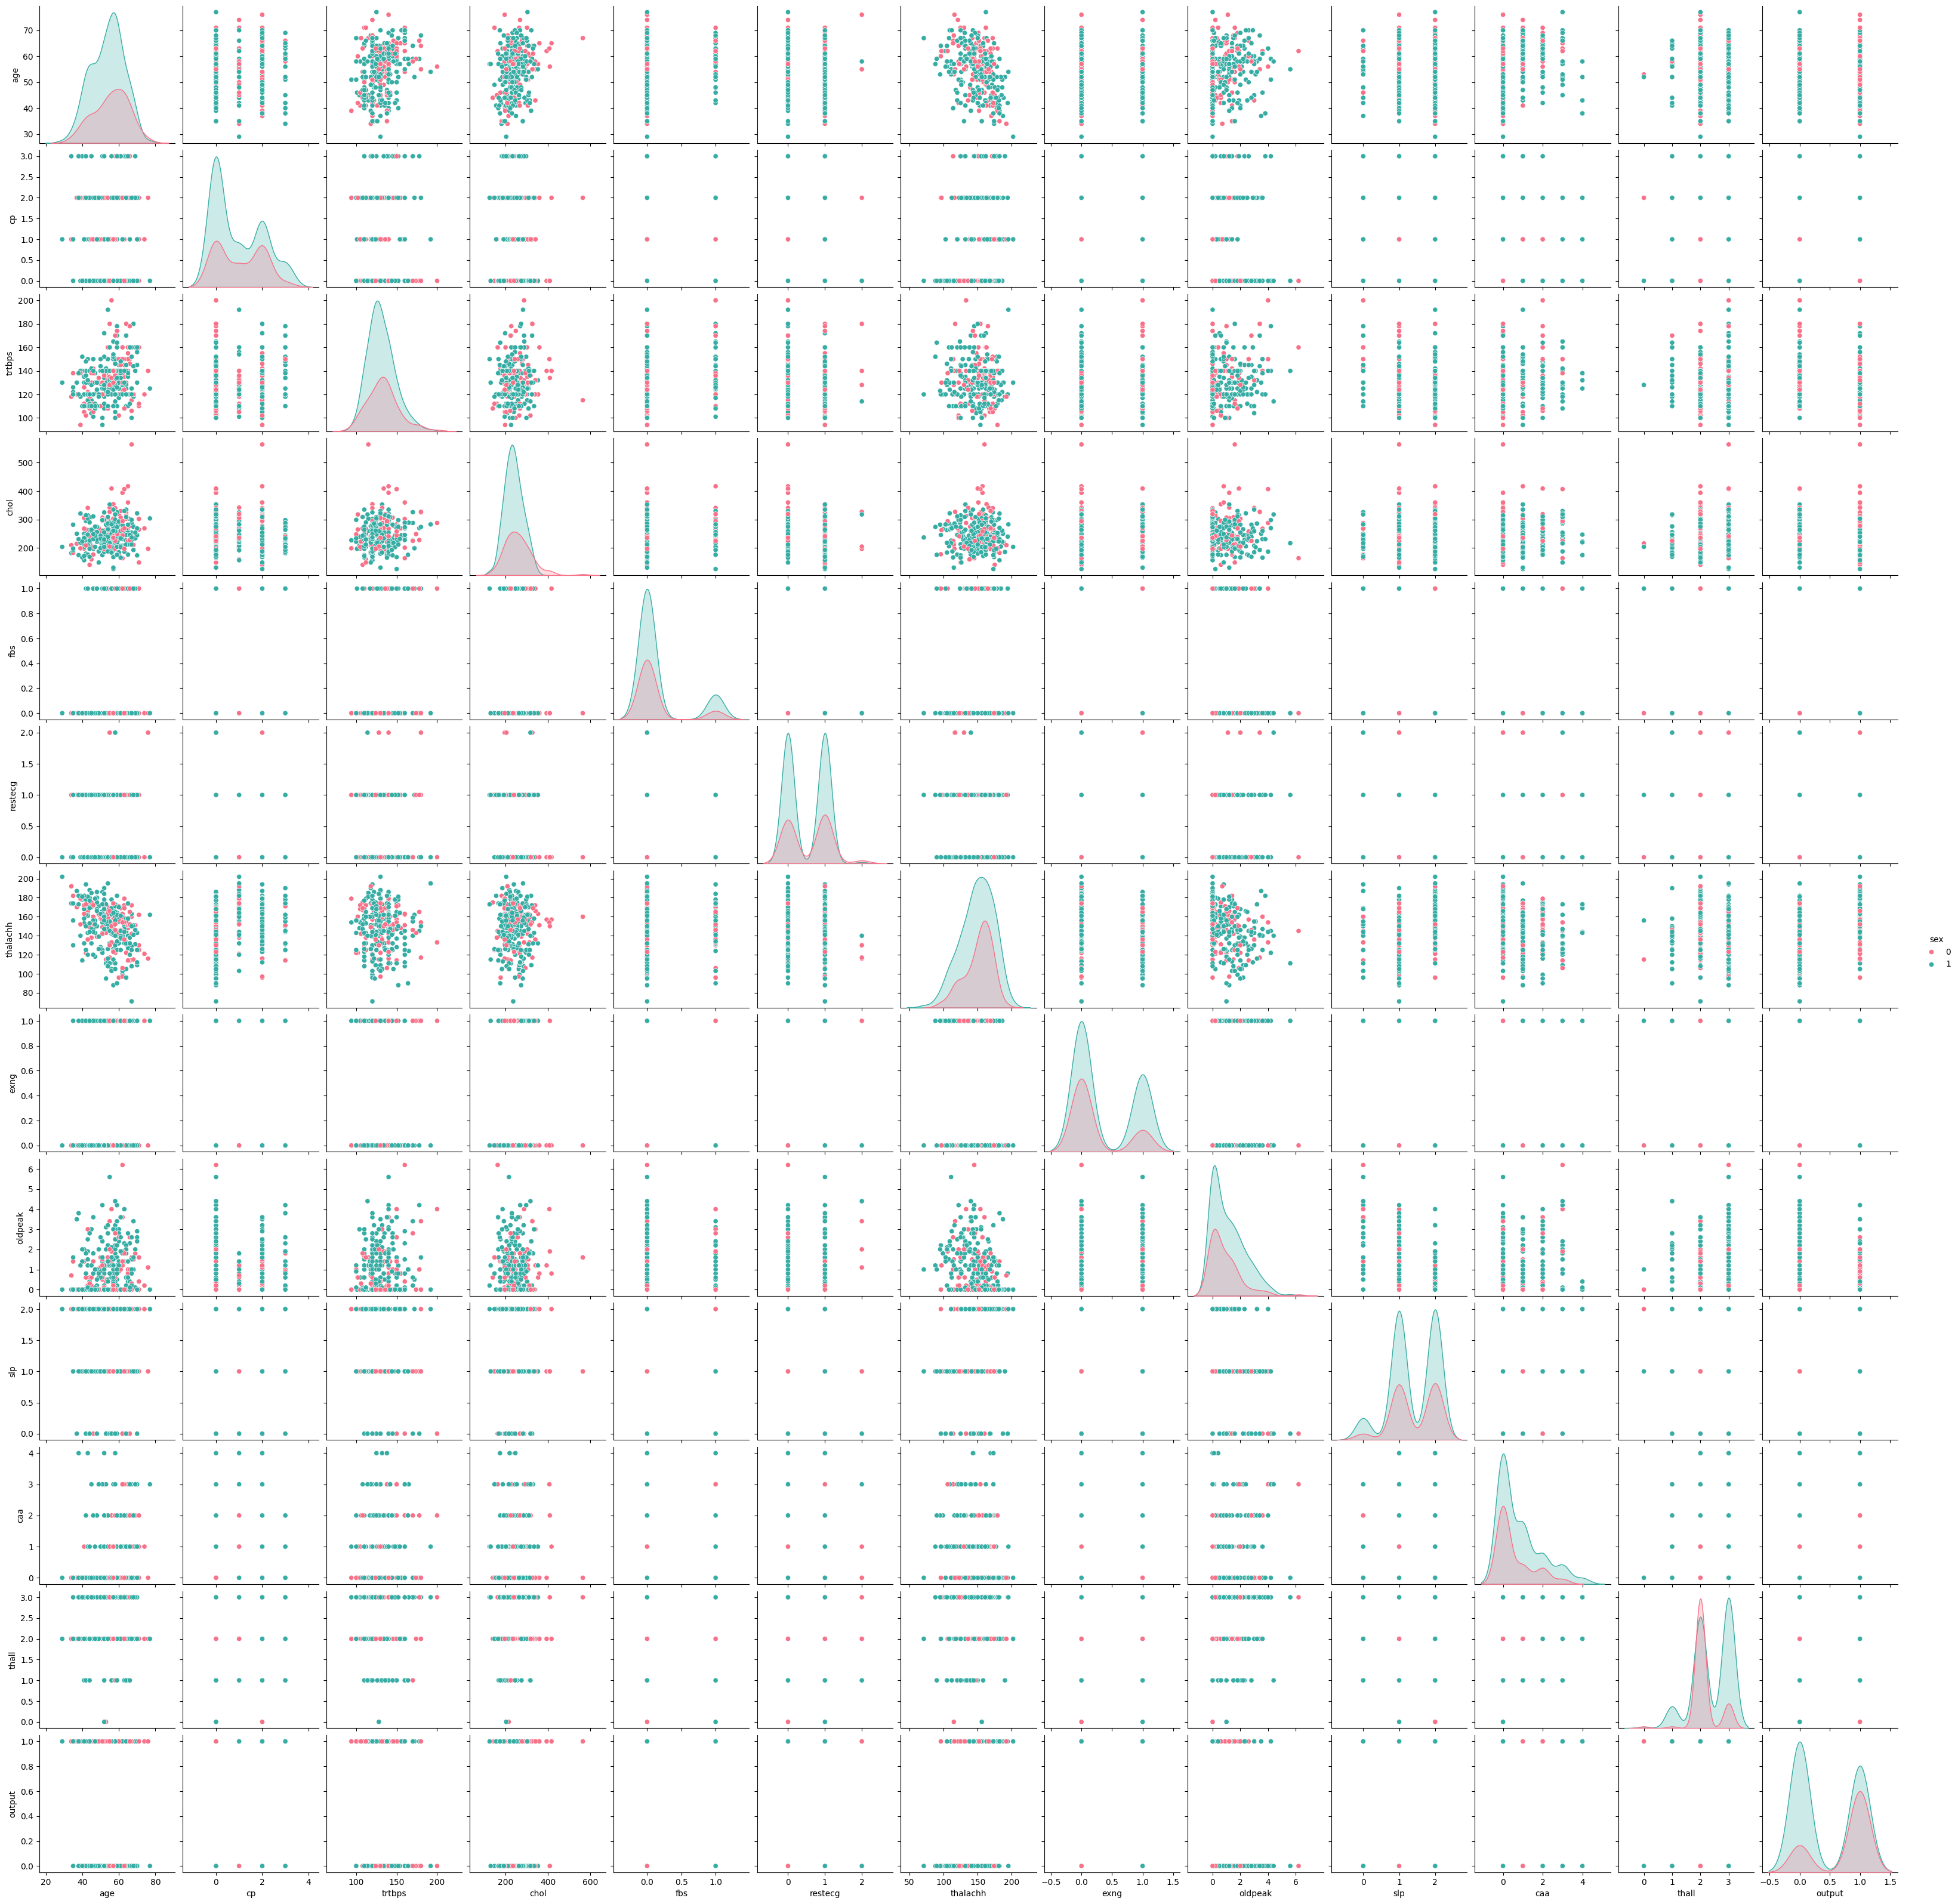

In [ ]:
#  Парные диаграммы (Pairplot)
if 'sex' in df.columns:
    sns.pairplot(df, hue='sex', palette='husl')
else:
    sns.pairplot(df)
plt.show()
